In [351]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [352]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv.txt', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv.txt', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv.txt', encoding="windows-1252")

In [353]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [354]:
sr.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [355]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# 1. Mean poverty rate of each state (Geographic Area)

In [356]:
pr["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [357]:
pr["City"].nunique()

24255

# INSTRUCTION-1: replace the "-" with zero.

In [358]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
77         1
76.5       1
56.1       1
66.3       1
78.3       1
Name: poverty_rate, Length: 771, dtype: int64

In [359]:
pr["poverty_rate"] = pr["poverty_rate"].replace("-", 0)

In [360]:
pr.poverty_rate.value_counts()

0       1464
0        201
6.7      129
7.4      129
10.9     128
        ... 
76.7       1
88.7       1
83.9       1
67.5       1
92         1
Name: poverty_rate, Length: 771, dtype: int64

In [361]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


# INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).

In [362]:
pr["poverty_rate"].dtype

dtype('O')

In [363]:
pr["poverty_rate"] = pr.poverty_rate.astype(float)

In [364]:
pr["poverty_rate"].dtype

dtype('float64')

In [365]:
pr["poverty_rate"]

0        78.8
1        29.1
2        25.5
3        30.7
4        42.0
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328     0.0
Name: poverty_rate, Length: 29329, dtype: float64

In [366]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [367]:
pr.poverty_rate.value_counts()

0.0     1665
6.7      129
7.4      129
10.0     128
10.9     128
        ... 
56.3       1
44.5       1
76.3       1
77.2       1
62.2       1
Name: poverty_rate, Length: 770, dtype: int64

# INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)

# INSTRUCTION-3.a.1 : Plot With Pandas Built in method:

In [368]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [369]:
pr.groupby("Geographic Area").poverty_rate.mean().head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

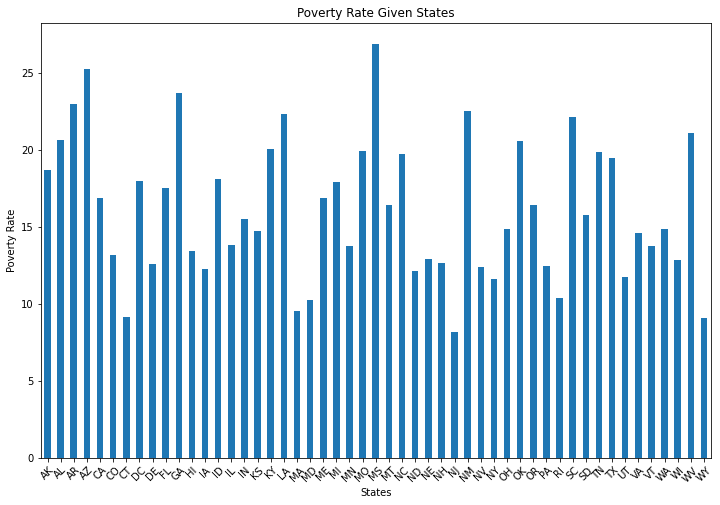

In [370]:
fig, axs = plt.subplots()

(pr.groupby("Geographic Area").poverty_rate.mean()).plot.bar(x= "Geographic Area", y="poverty_rate", rot=45, ax=axs,figsize=(12,8))
axs.set_xlabel("States")
axs.set_ylabel("Poverty Rate")
axs.set_title("Poverty Rate Given States");

In [371]:
States= pr.groupby("Geographic Area").poverty_rate.mean()

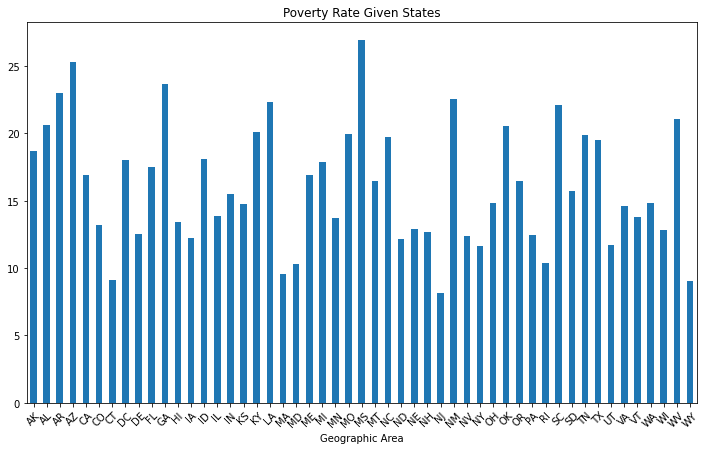

In [477]:
States.plot.bar(figsize=(12,7), title="Poverty Rate Given States", rot=45);

# INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:

In [373]:
sort_states= States.sort_values(ascending=False)

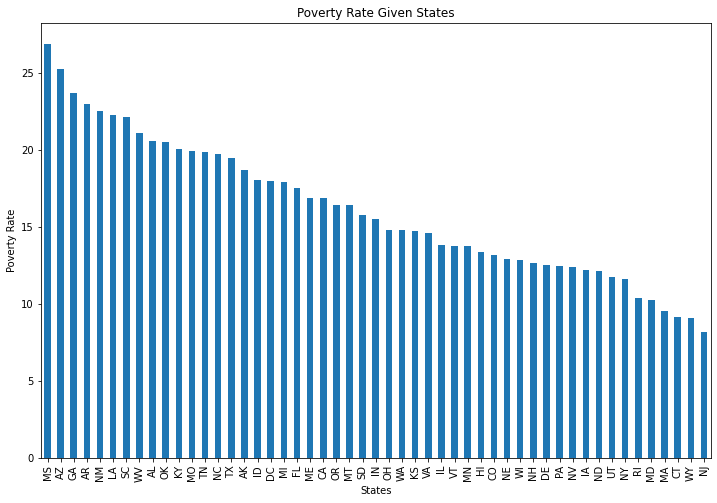

In [374]:
fig, axs = plt.subplots()
sort_states.plot.bar(x= "Geographic Area", y="poverty_rate", ax=axs, sort_columns= bool, figsize=(12,8))
axs.set_xlabel("States")
axs.set_ylabel("Poverty Rate")
axs.set_title("Poverty Rate Given States");

# INSTRUCTION-3.b : Plot Sorted Values With Seaborn and set a green horizontal line on 20

In [375]:
order=pr.sort_values(by=["poverty_rate"], ascending=[False])

In [376]:
labels=pr.groupby("Geographic Area").poverty_rate.mean().sort_values(ascending=False).index

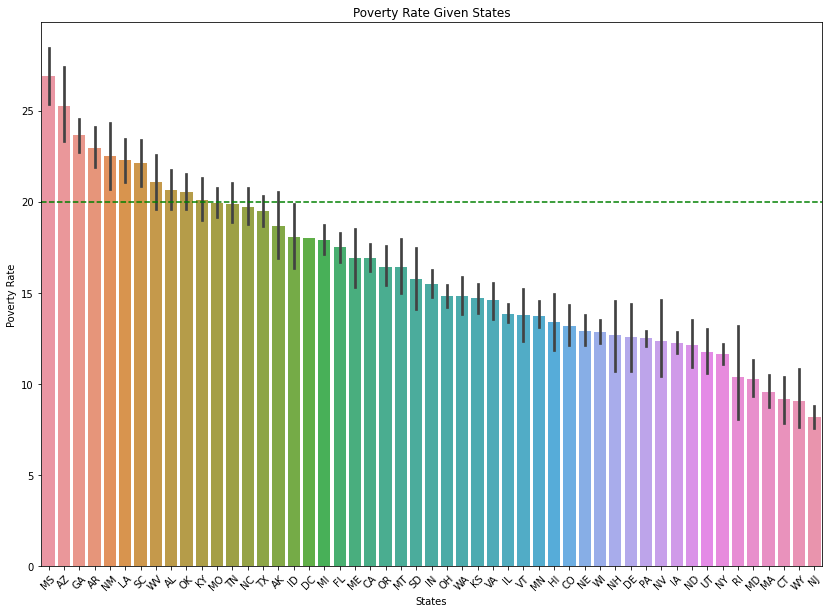

In [377]:
fig, ax =plt.subplots(figsize=(14,10))
sns.barplot(x= "Geographic Area", y= "poverty_rate", order=labels, data= pr)
ax.axhline(y=20, color="green", ls="--")
ax.set_xlabel("States")
ax.set_ylabel("Poverty Rate")
ax.set_title("Poverty Rate Given States")
ax.set_xticklabels(labels, rotation=45);

# 2. Most common 15 Name or Surname of killed people

In [378]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [379]:
kill.shape

(2535, 14)

In [380]:
kill["name"].count()

2535

In [381]:
kill["name"].value_counts()

TK TK                       49
TK Tk                        2
Brandon Jones                2
Michael Brown                2
Daquan Antonio Westbrook     2
                            ..
Westley Daum                 1
Michael K. Casper            1
Bruce Dawley                 1
Terry Lynn Maurer            1
Richard Parent               1
Name: name, Length: 2481, dtype: int64

In [382]:
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [383]:
type(pairs)

pandas.core.series.Series

# INSTRUCTION : Plot Most common 15 Name OR Surname of killed people

In [384]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [385]:
# pairs.shape, pairs[0], pairs[0][0], 
#table=[]
#for i in pairs:,for j in i .. formülüyle isim ve soyisimleri saydırıyoruz

In [386]:
seperate = kill.name[kill.name != "TK TK"].str.split()
a,b = zip(*seperate)
name_list =a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)

In [387]:
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [388]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,91
1,David,57
2,James,56
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,37


In [488]:
labels=df.name_or_surname_most_frequency
x=np.arange(len(labels))

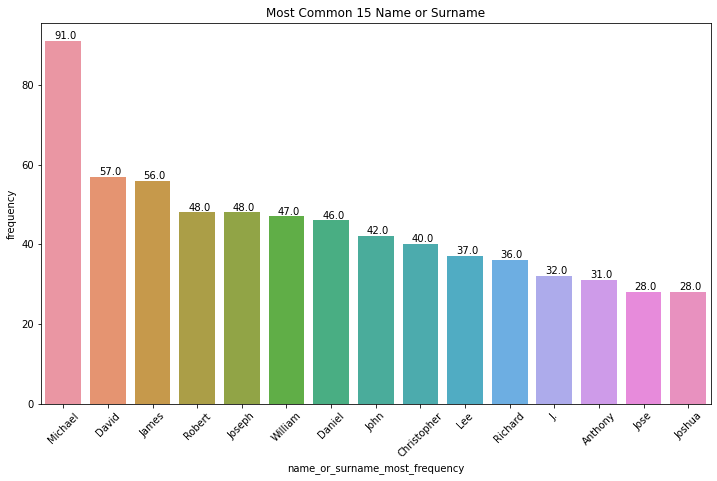

In [491]:
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(x="name_or_surname_most_frequency", y="frequency", data=df)
ax.set_ylabel("frequency")
ax.set_xlabel("name_or_surname_most_frequency")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_title("Most Common 15 Name or Surname")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

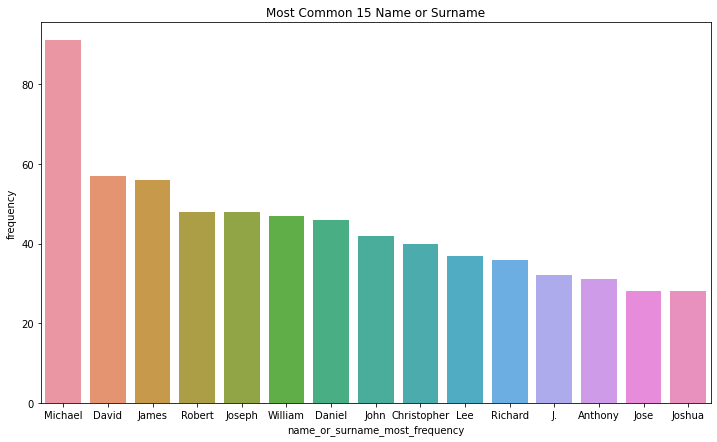

In [393]:
fig, ax=plt.subplots(figsize=(12,7))
sns.barplot(x=df.name_or_surname_most_frequency, y=df.frequency, ax=ax)
ax.set_title("Most Common 15 Name or Surname");

# 3. Killed People According to Races (Pie Chart)

In [394]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [395]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [396]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [397]:
kill.dropna(subset=["race"], inplace=True)

In [398]:
kill.shape

(2340, 14)

In [399]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [400]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [401]:
labels=kill.race.value_counts().index

In [402]:
sizes=kill.race.value_counts().values

In [425]:
myexplode=(0.2,0,0.1,0.1,0.1,0.1)

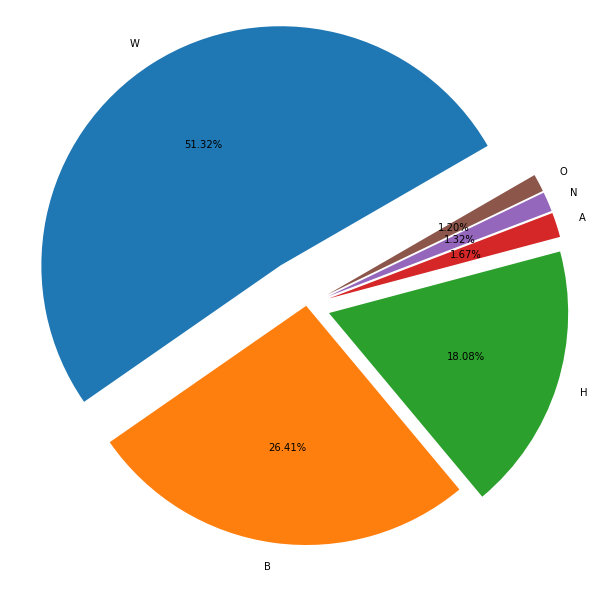

In [427]:
fig,ax=plt.subplots(figsize=(15,11))
ax.pie(sizes, labels=labels, autopct="%1.2f%%", explode=myexplode, startangle=30);

# 4a.Box plot of age in both genders separeted by manner of death.

In [404]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [405]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

# INSTRUCTION: Demonstrate the Quartiles of age in both genders separeted by manner of death.

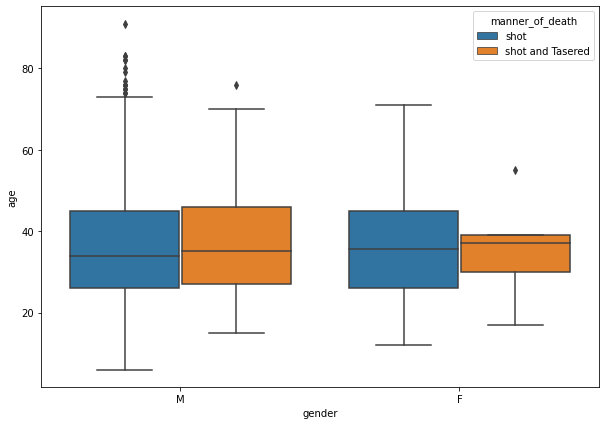

In [406]:
fig,ax = plt.subplots(figsize=(10,7))
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill);

# 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

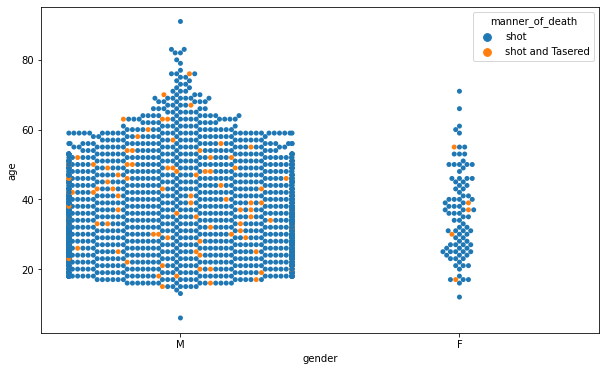

In [407]:
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=kill);

# 5. Kill properties (Count Plots)
# INSTRUCTION-1: Plot number of people by gender

In [408]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


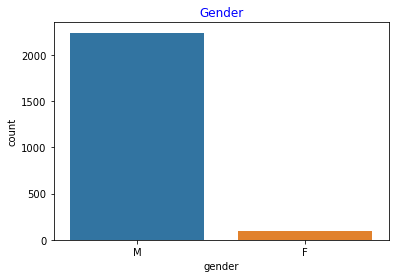

In [409]:
fig,ax = plt.subplots()
sns.countplot(x="gender", data=kill)
ax.set_title("Gender", color="b");

# INSTRUCTION-2: Plot 7 most common kill weapons

In [294]:
kill.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [300]:
c_armed=kill["armed"].value_counts()[:7].index
c_armed

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object')

In [301]:
d_armed=kill["armed"].value_counts()[:7].values
d_armed

array([1398,  373,  177,  171,  117,  104,   18], dtype=int64)

In [303]:
labels=list(c_armed)
x=np.arange(len(labels))

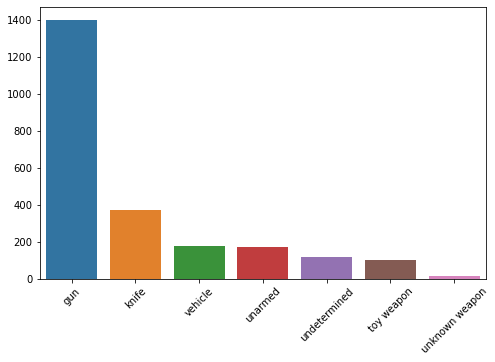

In [305]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(c_armed,d_armed)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45);

# INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [306]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.groupby(["age"])

In [307]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >25 else "below25")

In [308]:
kill["age_cat"]

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    below25
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [314]:
kill.groupby(kill["age_cat"]).count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
age_cat,,,,,,,,,,,,,,
above25,1905,1905,1905,1905,1897,1905,1905,1779,1905,1905,1905,1905,1861,1905
below25,630,630,630,630,629,553,630,561,630,630,630,630,609,630


In [335]:
ast=kill.groupby(["age_cat"]).count()
ast

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
age_cat,,,,,,,,,,,,,,
above25,1905,1905,1905,1905,1897,1905,1905,1779,1905,1905,1905,1905,1861,1905
below25,630,630,630,630,629,553,630,561,630,630,630,630,609,630


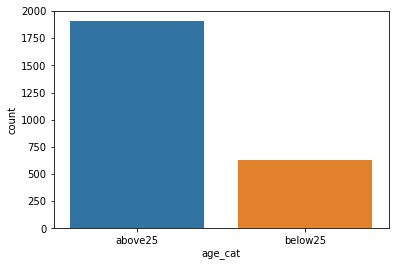

In [338]:
sns.countplot(x=kill["age_cat"], data=kill);

# INSTRUCTION-4: Plot number of killed poeple by race

In [339]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [340]:
kill["race"].head()

0    A
1    W
2    H
3    W
4    H
Name: race, dtype: object

In [342]:
kill.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
race,,,,,,,,,,,,,,
A,39,39,39,39,39,38,39,39,39,39,39,37,39,39
B,618,618,618,618,614,609,618,618,618,618,618,605,618,618
H,423,423,423,423,422,413,423,423,423,423,423,411,423,423
N,31,31,31,31,31,31,31,31,31,31,31,29,31,31
O,28,28,28,28,28,28,28,28,28,28,28,28,28,28
W,1201,1201,1201,1201,1200,1192,1201,1201,1201,1201,1201,1178,1201,1201


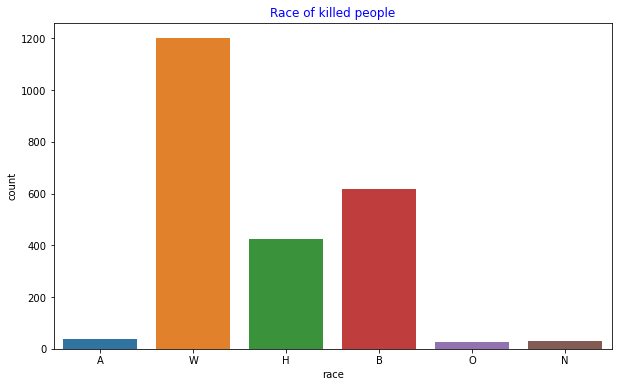

In [438]:
plt.figure(figsize=(10,6))
sns.countplot(x=kill["race"], data=kill)
plt.title("Race of killed people", color="b");

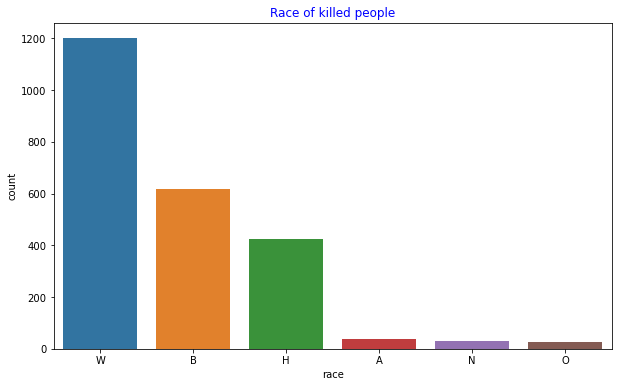

In [439]:
plt.figure(figsize=(10,6))
sns.countplot(x=kill["race"], order=kill.groupby("race").race.count().sort_values(ascending=False).index, data=kill)
plt.title("Race of killed people", color="b");

# INSTRUCTION-5: Plot 12 most dangerous cities

In [440]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [444]:
city_group=kill.groupby("city").city.count().sort_values(ascending=False)
city_group

city
Los Angeles          36
Phoenix              28
Houston              26
Chicago              24
Columbus             18
                     ..
Lizella               1
Livingston Parish     1
Livingston            1
Little Mountain       1
Abbeville             1
Name: city, Length: 1320, dtype: int64

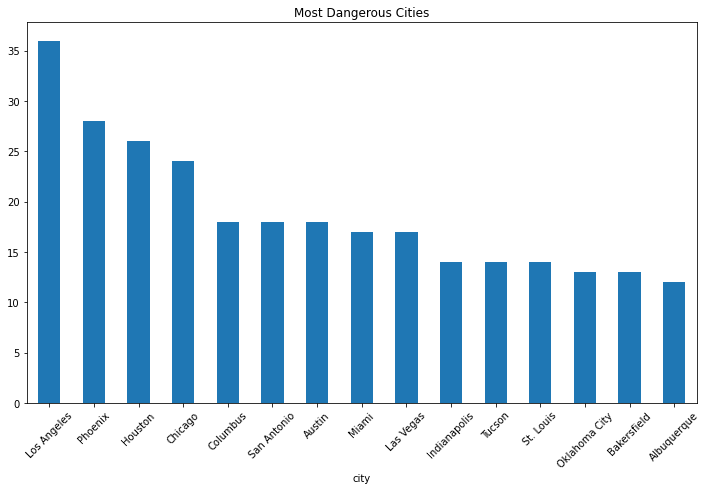

In [460]:
(kill.groupby("city").city.count().sort_values(ascending=False)[:15]).plot.bar(title="Most Dangerous Cities", figsize=(12,7), rot=45);

#  INSTRUCTION-6: Plot 20 most dangerous states

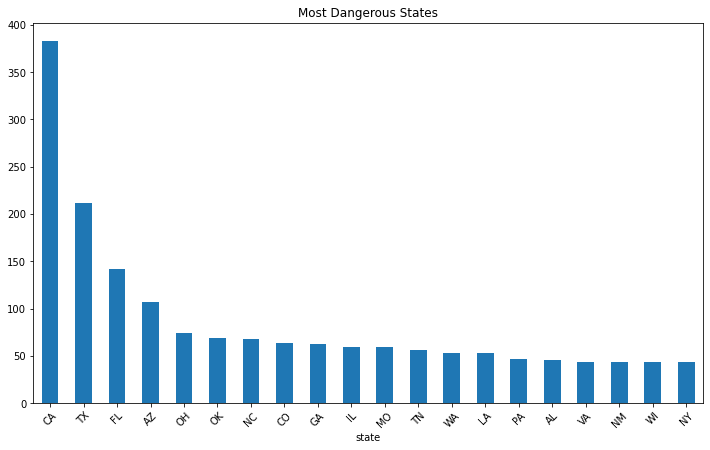

In [462]:
(kill.groupby("state").state.count().sort_values(ascending=False)[:20]).plot.bar(title="Most Dangerous States", figsize=(12,7), rot=45);

# INSTRUCTION-7: Plot Having mental ilness or not for killed people

In [458]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


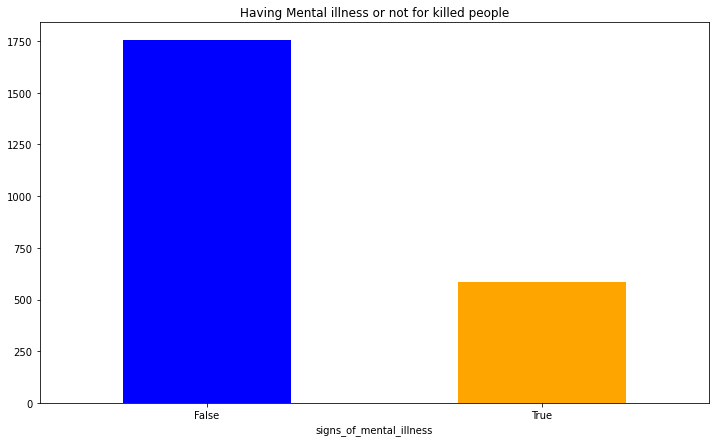

In [470]:
(kill.groupby("signs_of_mental_illness").signs_of_mental_illness.count().sort_values(ascending=False)[:20]).plot.bar(title="Having Mental illness or not for killed people", figsize=(12,7), rot=0, color=["blue", "orange"]);

# INSTRUCTION-8: Plot number of Threat Types

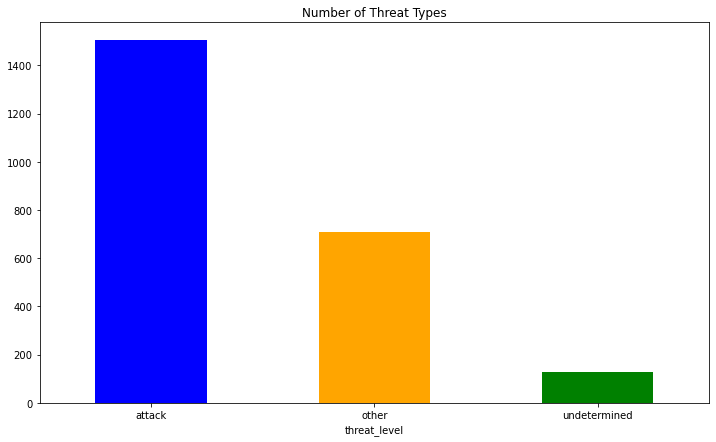

In [468]:
(kill.groupby("threat_level").threat_level.count().sort_values(ascending=False)).plot.bar(title="Number of Threat Types", figsize=(12,7), rot=0, color=["blue", "orange", "green"]);

# INSTRUCTION-9: Plot number of Flee Types

In [471]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


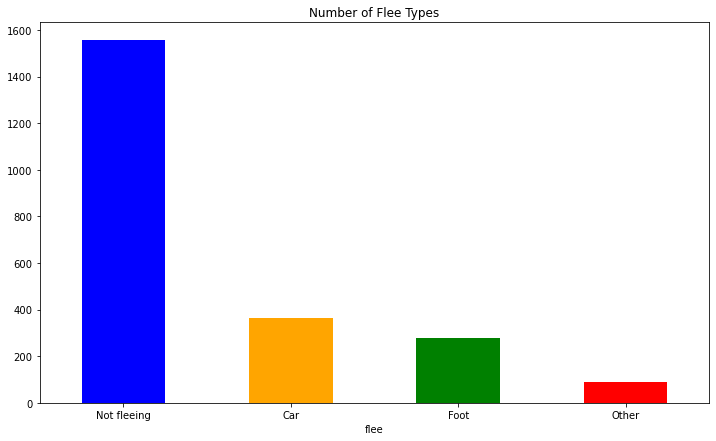

In [472]:
(kill.groupby("flee").flee.count().sort_values(ascending=False)).plot.bar(title="Number of Flee Types", figsize=(12,7), rot=0, color=["blue", "orange", "green", "red"]);